In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
import statsmodels.api as sm

In [138]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, Lars
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [139]:
# import warnings
# warnings.filterwarnings("ignore")

In [140]:
automobile_df = pd.read_csv('automobile_df_processed.csv')
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,27.2,4,119.0,97.0,2300,14.7,44
1,13.0,8,350.0,145.0,3988,13.0,49
2,32.4,4,107.0,72.0,2290,17.0,42
3,15.0,8,350.0,145.0,4082,13.0,49
4,13.0,8,360.0,175.0,3821,11.0,49


In [141]:
result_dict = {}

In [142]:
def build_model(regression_fn, col_y_name, col_x_names, dataset, test_frac=.2, preprocess_fn=None, show_plot_y=False, show_scatter=False):
    X = dataset[col_x_names]
    y = dataset[col_y_name]

    if preprocess_fn:
        X = preprocess_fn(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_frac)

    model = regression_fn(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Trining score:", model.score(X_train, y_train))
    print("Testing score:", r2_score(y_test, y_pred))

    if show_plot_y:
        plt.plot(y_test.values, label='Actual')
        plt.plot(y_pred, label='Predicted')
        plt.legend(['Predict', 'Actual'])
        plt.show()
        
    return {
        'train_score': model.score(X_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }


In [143]:
def compare_results(results): 
    for key in results:
        print('Regression Model:', key)
        print('Training Score:', results[key]['train_score'])
        print('Testing Score:', results[key]['test_score'])
        print()        

In [144]:
def linear_regression(X, y):
    return LinearRegression(normalize=True).fit(X, y)

Trining score: 0.6951466734329412
Testing score: 0.6772597613514757


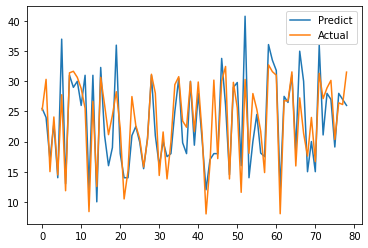

In [145]:
result_dict['mpg - single linear'] = build_model(
    linear_regression, 'mpg', ['weight'], automobile_df, show_plot_y=True)


Trining score: 0.7070113180505498
Testing score: 0.7049903088810683


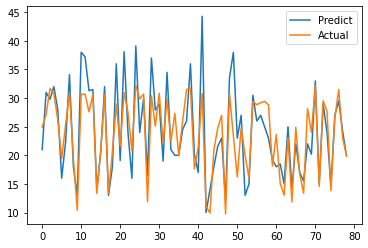

In [146]:
result_dict['mpg - kitchen sink linear'] = build_model(linear_regression, 'mpg', [
                                                       'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)


Trining score: 0.7052033678419729
Testing score: 0.7076240592378926


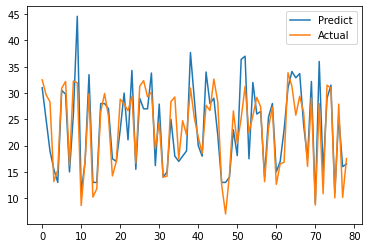

In [147]:
result_dict['mpg - parsimonius linear'] = build_model(
    linear_regression, 'mpg', ['weight', 'horsepower'], automobile_df, show_plot_y=True)


In [148]:
compare_results(result_dict)

Regression Model: mpg - single linear
Training Score: 0.6951466734329412
Testing Score: 0.6772597613514757

Regression Model: mpg - kitchen sink linear
Training Score: 0.7070113180505498
Testing Score: 0.7049903088810683

Regression Model: mpg - parsimonius linear
Training Score: 0.7052033678419729
Testing Score: 0.7076240592378926



In [149]:
def lasso_regression(X, y, alpha=.5):
    return Lasso(alpha=alpha).fit(X, y)

Trining score: 0.7034219119398555
Testing score: 0.7199895527683724


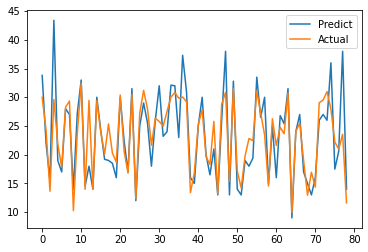

In [150]:
result_dict['mpg - kitchen sink lasso'] = build_model(lasso_regression, 'mpg', [
                                                       'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)

In [151]:
def ridge_regression(X, y, alpha=.5, normalize=True):
    return Ridge(alpha=alpha, normalize=normalize).fit(X, y)

Trining score: 0.6947882187874781
Testing score: 0.6409094941728763


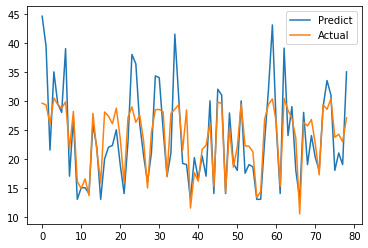

In [152]:
result_dict['mpg - kitchen sink lasso'] = build_model(ridge_regression, 'mpg', [
                                                       'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)

In [153]:
def elastic_net_regression(X, y, alpha=1, l1_ratio=.5, normalize=False,
                           max_iter=100000, warm_start=True, 
                           equivalent_to='Elastic Net'):
    print('Equivalent To:', equivalent_to)
    return ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start).fit(X, y)


In [154]:
from functools import partial

Equivalent To: OLS
Trining score: 0.7211266731722998
Testing score: 0.6517810109303585


C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_52108/3930991394.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize, max_iter=max_iter, warm_start=warm_start).fit(X, y)
C:\Users\t-nweisler\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


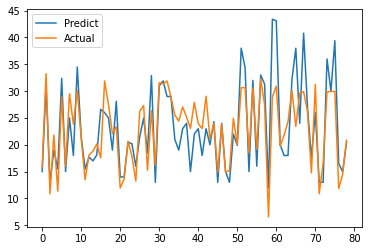

In [155]:
result_dict['mpg - kitchen sink elastic net ols'] = build_model(partial(elastic_net_regression, alpha=0, equivalent_to='OLS'), 'mpg', [
    'weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'], automobile_df, show_plot_y=True)


Equivalent To: Lasso
Trining score: 0.6978799956809434
Testing score: 0.7480375169413798


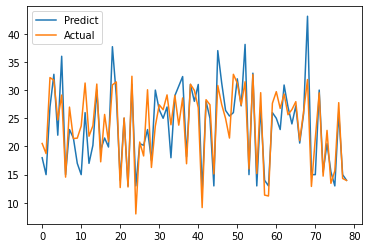

In [156]:
result_dict['mpg - kitchen sink elastic net lasso'] = build_model(
    partial(elastic_net_regression, alpha=1,
            l1_ratio=1, equivalent_to='Lasso'),
    'mpg',
    ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
    automobile_df, show_plot_y=True)


Equivalent To: Lasso
Trining score: 0.7043421033494097
Testing score: 0.7078527012482164


C:\Users\t-nweisler\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2619.872477760111, tolerance: 1.7681519872204474
  model = cd_fast.enet_coordinate_descent(


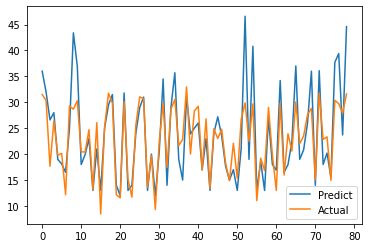

In [157]:
result_dict['mpg - kitchen sink elastic net lasso'] = build_model(
    partial(elastic_net_regression, alpha=1,
            l1_ratio=0, equivalent_to='Lasso'),
    'mpg',
    ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
    automobile_df, show_plot_y=True)


Equivalent To: Lasso
Trining score: 0.7019099187465021
Testing score: 0.7250728261848884


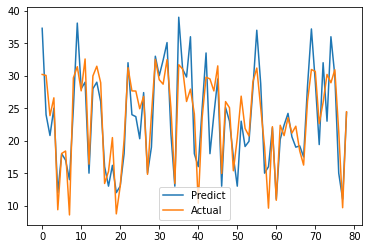

In [160]:
result_dict['mpg - kitchen sink elastic net lasso'] = build_model(
    partial(elastic_net_regression, alpha=1,
            l1_ratio=0.5, equivalent_to='Lasso'),
    'mpg',
    ['weight', 'horsepower', 'cylinders', 'displacement', 'acceleration'],
    automobile_df, show_plot_y=True)
